In [27]:
import numpy as np               #loading our favorite library
import matplotlib.pyplot as plt   #and the useful plotting library
plt.style.use('presentation')
%matplotlib inline
from IPython.html.widgets import interact
from IPython.display import clear_output, display, HTML
def calc_heat(nu):
    nx = 41
    dx = 2 / (nx - 1)
    nt = 20    #the number of timesteps we want to calculate
    # nu = 0.3   #the value of viscosity
    sigma = .2 #sigma is a parameter, we'll learn more about it later
#     dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!
    dt = dx**2 #dt is defined using sigma ... more later!


    u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
    u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    
    plt.plot(np.linspace(0, 2, nx), u,'k--');

    un = np.ones(nx) #our placeholder array, un, to advance the solution in time

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
            u[0] = 1
            u[-1] = 1
    plt.plot(np.linspace(0, 2, nx), u,'r--');
    plt.xlabel('x')
    plt.ylabel('T')

    plt.xlim(0,2)
    plt.ylim(1,2)
    plt.show()
    return None
interact(calc_heat, nu=(0., 2, 0.1))


# we may want to add the source term
#  + \ 
#                    dt*f(x[i], t[n])
# works until 0.5

interactive(children=(FloatSlider(value=1.0, description='nu', max=2.0), Output()), _dom_classes=('widget-interact',))

<function __main__.calc_heat>

https://www.youtube.com/watch?v=fGZwb5po3ZU

http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/

In [1]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
import numpy as np

x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)


In [2]:
f(x)

In [3]:
f(x)- sympy.exp(x)

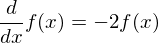

In [5]:
diff_eq = sympy.Eq(f(x).diff(x), -2*f(x))
diff_eq

In [7]:
soln = sympy.dsolve(diff_eq,f(x))
soln

In [9]:
# f(0) = 1
constants = sympy.solve([soln.rhs.subs(x,0) - 1])
constants

In [13]:
C1 = sympy.symbols('C1')
soln = soln.subs(constants)
# soln = soln.subs({'C1':1})
soln

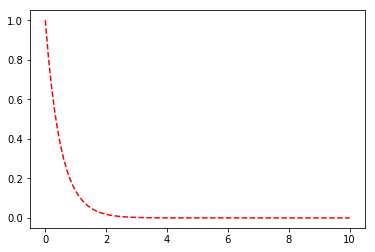

In [17]:
x_array = np.linspace(0, 10, 100)
# y_array = sympy.soln(x_array)
func = sympy.lambdify(x, soln.rhs, 'numpy')
y_array = func(x_array)
plt.plot(x_array, y_array,'r--')

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


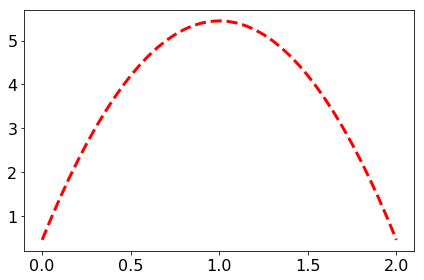

In [32]:
import sympy
x, t, a, L = sympy.symbols('x t a L')
u = x*(L-x)*5*t

def pde(u):
    return sympy.diff(u, t) - a*sympy.diff(u, x, x)

f = sympy.simplify(pde(u))

a = 0.3
L = 2.
u_exact = sympy.lambdify(
    [x, t], u.subs('L', L).subs('a', a), modules='numpy')
f = sympy.lambdify(
    [x, t], f.subs('L', L).subs('a', a), modules='numpy')
I = lambda x: u_exact(x, 0)

x_array = np.linspace(0, 2.,41)
plt.plot(x_array, f(x_array, 0.15),'r--')